### 6.4 Supervised Machine Learning: Regression



# 1. Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Importing data

In [6]:
path = r'C:/Users/Marker/Desktop/World Risk Index 03-25'

In [8]:
# Import "WRI_iso_updated.csv"
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WRI_iso_updated.csv'), index_col = False)

In [10]:
# Confirm the shape of the dataset
df.shape

(1917, 13)

# 3. Data cleaning

In [13]:
# Check the dataframe's columns
df.columns

Index(['Country', 'ISO_a3', 'Year', 'WRI', 'Exposure', 'Vulnerability',
       'Susceptibility', 'Lack of Coping Capacities',
       'Lack of Adaptive Capacities', 'WRI Category', 'Exposure Category',
       'Vulnerability Category', 'Susceptibility Category'],
      dtype='object')

In [15]:
# Check a sample
df.head()

,Country,ISO_a3,Year,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capacities,Lack of Adaptive Capacities,WRI Category,Exposure Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,VUT,2011,32.00,56.33,56.81,37.14,79.34,53.96,Very High,Very High,High,High
1,Tonga,TON,2011,29.08,56.04,51.90,28.94,81.80,44.97,Very High,Very High,Medium,Medium
2,Philippines,PHL,2011,24.32,45.09,53.93,34.99,82.78,44.01,Very High,Very High,High,High
3,Solomon Islands,SLB,2011,23.51,36.40,64.60,44.11,85.95,63.74,Very High,Very High,Very High,High
4,Guatemala,GTM,2011,20.88,38.42,54.35,35.36,77.83,49.87,Very High,Very High,High,High


### Missing values

In [18]:
# Check for missing values
df.isnull().sum()

Country                        0
ISO_a3                         0
Year                           0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capacities      0
Lack of Adaptive Capacities    0
WRI Category                   0
Exposure Category              0
Vulnerability Category         0
Susceptibility Category        0
dtype: int64



No missing values found.

### Duplicates

In [22]:
# Find full duplicates
df_dups = df[df.duplicated()]

df_dups

,Country,ISO_a3,Year,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capacities,Lack of Adaptive Capacities,WRI Category,Exposure Category,Vulnerability Category,Susceptibility Category




No duplicates found.

### Extreme values

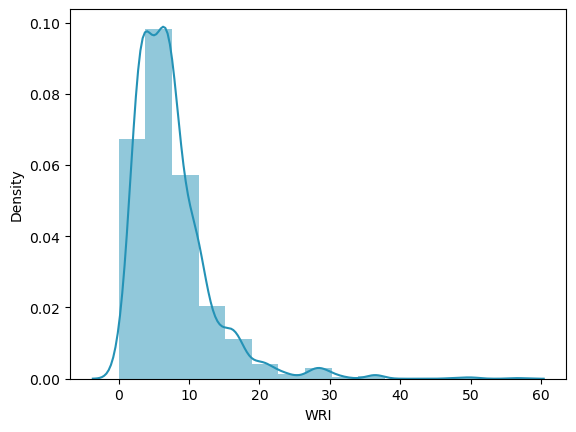

In [26]:
# Create a histplot to visualize extreme WRI values
hist_wri = sns.histplot(
    df['WRI'], kde=True,
    stat='density', kde_kws=dict(cut=3),
    bins=15,
    edgecolor='none',
    color='#2492b6',  
    line_kws={'color': '#005b92'}
)

In [28]:
# Export histrogram
hist_wri.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_hist_wri.png'), bbox_inches='tight')

In [30]:
# Check min, mean & max
df['WRI'].describe()

count    1917.000000
mean        7.546390
std         5.551136
min         0.020000
25%         3.740000
50%         6.520000
75%         9.370000
max        56.710000
Name: WRI, dtype: float64

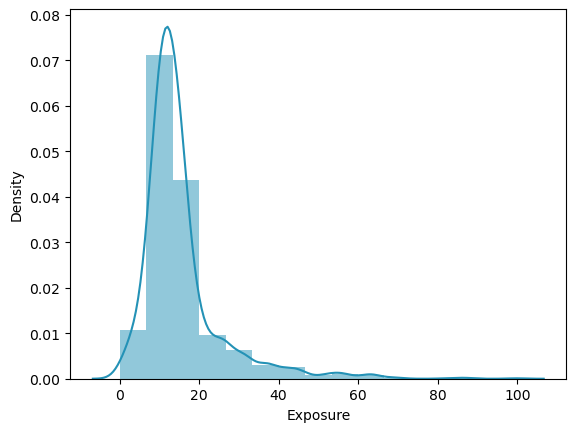

In [32]:
# Create a histplot to visualize extreme Exposure values
hist_exp = sns.histplot(
    df['Exposure'], kde=True,
    stat='density', kde_kws=dict(cut=3),
    bins=15,
    edgecolor='none',
    color='#2492b6',  
    line_kws={'color': '#005b92'}
)

In [34]:
# Export histrogram
hist_exp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4_hist_exp.png'), bbox_inches='tight')

In [36]:
# Check min, mean & max
df['Exposure'].describe()

count    1917.000000
mean       15.380026
std        10.234068
min         0.050000
25%        10.160000
50%        12.760000
75%        16.450000
max        99.880000
Name: Exposure, dtype: float64

#### Note:

Some extremely high values for both WRI and Exposure could potentially be considered outliers. However, as there is no reasonable justification for them and they may be inherent in the data, they are not removed to avoid the risk of distorting reality and potentially biasing the model.

# 4. Data preparation

### Data visualization

Text(0.5, 1.0, 'WRI vs. Exposure Scatterplot')

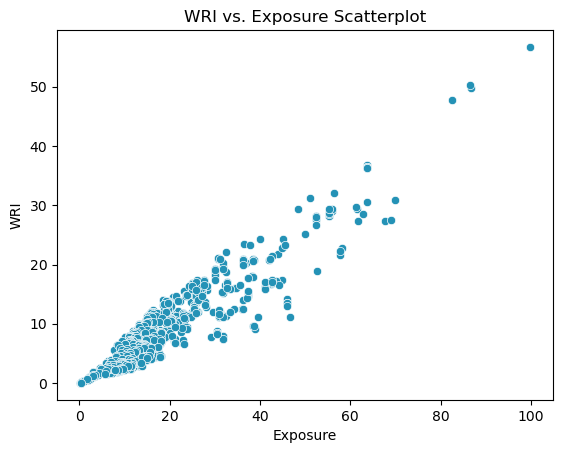

In [131]:
# Create a scatterplot to check how variables plot against each other
scat4_wri_exp = sns.scatterplot(x='Exposure', y='WRI', data=df, color='#2492b6')

# Set a title
plt.title('WRI vs. Exposure Scatterplot')

In [133]:
scat4_wri_exp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat4_wri_exp.png'), bbox_inches='tight', dpi=300)


### Hypothesis

*"The higher a country's exposure to natural hazards, the higher its overall risk index."*

### NumPy arrays

In [48]:
# Reshape variables into NumPy arrays & put them into separate objects
X = df['Exposure'].values.reshape(-1,1) # independent
y = df['WRI'].values.reshape(-1,1) # dependent (the one that should be predicted)

In [50]:
# Check the output of the independent variable
X

array([[56.33],
       [56.04],
       [45.09],
       ...,
       [ 2.93],
       [ 1.65],
       [ 0.28]])

In [52]:
# Check the output of the dependent variable
y

array([[32.  ],
       [29.08],
       [24.32],
       ...,
       [ 1.14],
       [ 0.6 ],
       [ 0.08]])

In [54]:
# Split data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression analysis

### Predicting the test set

In [58]:
# Create a regression object
regression = LinearRegression()

In [60]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predict the values of y using X_test
y_predicted = regression.predict(X_test)

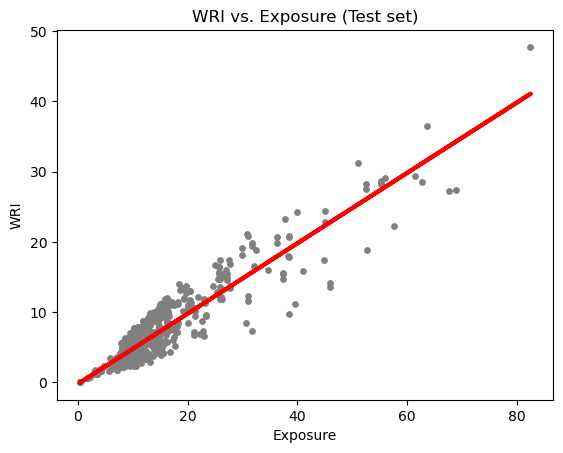

In [135]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
scat4_testset = plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('WRI vs. Exposure (Test set)')
plot_test.xlabel('Exposure')
plot_test.ylabel('WRI')
plot_test.show()

In [137]:
scat4_testset.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat4_testset.png'), bbox_inches='tight', dpi=300)


#### Interpretation:

* The plot output of the linear regression model generally follows a single, straight regression line, indicating a positive relationship between Exposure and WRI. 
* Lower values tend to be closer to the regression line than higher values. 
* There are fewer high values (WRI > 10, Exposure > 20), which could potentially make it more difficult for the model to accurately predict higher values and contribute to some inaccuracy in this range. 
* However, overall the plot shows a good fit of the predicted values to the regression line, suggesting that the model effectively captures the strong positive relationship between Exposure and WRI.

In [67]:
# Create objects containing the model's summary statistics
rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [69]:
# Print summary statistics
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.49996642]]
Mean squared error:  5.023977788209461
R2 score:  0.8386897606193113


In [71]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

data.head(50)

,Actual,Predicted
0,3.41,5.613427
1,3.47,3.468571
2,6.80,7.128325
3,7.46,5.468437
4,3.67,3.548566
5,6.45,7.083328
6,9.60,11.478033
7,5.30,4.433506
8,9.21,7.143324
9,7.17,6.488368


#### Interpretation:

**Slope:** 

* The positive slope coefficient indicates that there is a positive relationship between a country's exposure to natural hazards (Exposure) and its overall risk index (WRI). Specifically, for every unit increase in Exposure, the WRI is expected to increase by approximately 0.5 units.

**Mean Squared Error (MSE):**

* The MSE of 5 suggests that, on average, the model's predictions of WRI based on Exposure have a squared error of 5 units. Given the scale and variability of the dependent variable (WRI) and the context of the analysis, this MSE seems reasonable. It indicates that the model's predictions are relatively close to the actual WRI values and capture a substantial portion of the variability in the WRI based on Exposure.

**R2 score:** 

* The high R-squared value of about 0.84 indicates that about 84% of the variance in WRI can be explained by Exposure. This suggests a relatively strong relationship between Exposure and WRI, further supporting the validity of the regression model.

Based on these results, *the model appears to have performed well on the test set**:

It effectively captures the relationship between Exposure and WRI, as indicated by the positive slope coefficient and the high R-squared value.
The MSE, while not exceptionally small, is reasonable given the scale and variability of the WRI variable and the context of the analysis. It indicates that, on average, the model's predictions are close to the actual WRI values.
___
**Manual inspection:** 

* Upon visual inspection, it appears that the model generally predicts WRI values that are close to the actual values. However, there are cases where the predicted values are significantly different from the actual values.
* For example, at index 29, the predicted value (15.647753) is significantly higher than the actual value (7.35), indicating a large discrepancy.
* Overall, *while the model performs reasonably well, there are areas where it could be improved**, particularly in predicting extreme values. Further refinement of the model, possibly incorporating additional features or data, may help improve its predictive accuracy and reduce the discrepancies between actual and predicted values.
___
++Considerations for model prediction bias**:

* The data set may not fully capture all natural hazards and climate impacts, potentially biasing predictions due to under-representation of regions or disaster types.

* Model performance varies with the geographic distribution of data. Countries with extensive data may provide more accurate predictions, while countries with limited data face potential inaccuracies.

* Socio-economic factors and access to resources influence hazard coping; complex dynamics may be missed.

* Historical data may miss future trends such as urbanization or technology.

* Inaccuracies or gaps, along with reporting biases, can distort model generalization.

* Linear regression can oversimplify exposure-risk relationships, especially in non-linear cases.

### Comparison against training set

In [78]:
# Predict the values of y using X_train
y_predicted_train = regression.predict(X_train)

In [80]:
# Create objects containing the model's summary statistics
rmse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)

In [82]:
# Print summary statistics
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse_train)
print('R2 score: ', r2_train)

Slope: [[0.49996642]]
Mean squared error:  4.81642721969307
R2 score:  0.8424847440869


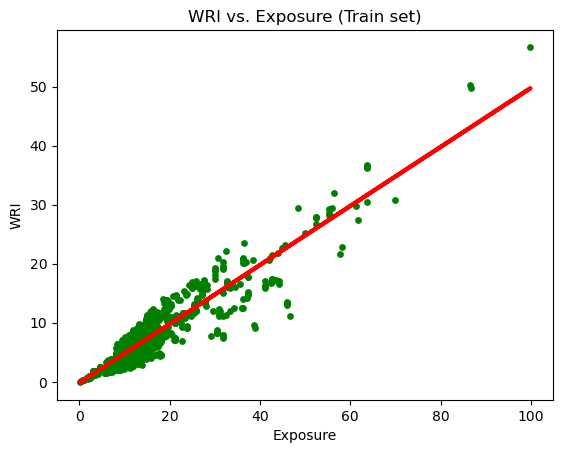

In [139]:
# Create a plot that shows the regression line from the model on the test set
plot_train = plt
scat4_trainset = plot_train.scatter(X_train, y_train, color='green', s=15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth=3)
plot_train.title('WRI vs. Exposure (Train set)')
plot_train.xlabel('Exposure')
plot_train.ylabel('WRI')
plot_train.show()

In [141]:
scat4_trainset.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat4_trainset.png'), bbox_inches='tight', dpi=300)

#### Interpretation:

The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.84), meaning that the model is *not overfitted**.

### Performance improvement after removing outliers

In [88]:
# Clean extreme values from WRI
df_sub = df[df['WRI'] <=40]

Text(0.5, 1.0, 'WRI vs. Exposure Scatterplot')

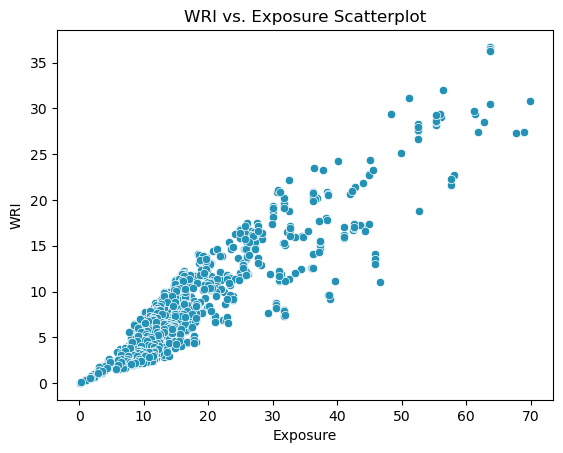

In [143]:
# Create a scatterplot to check how variables plot against each other
scat4_wri_exp = sns.scatterplot(x='Exposure', y='WRI', data=df_sub, color='#2492b6')

# Set a title
plt.title('WRI vs. Exposure Scatterplot')

In [92]:
# Reshape variables into NumPy arrays & put them into separate objects
X_2 = df_sub['Exposure'].values.reshape(-1,1) # independent
y_2 = df_sub['WRI'].values.reshape(-1,1) # dependent (the one that should be predicted)

In [94]:
# Split data into a training and a test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [96]:
# Create a regression object
regression_2 = LinearRegression()

In [98]:
# Fit the regression object onto the training set
regression_2.fit(X_train_2, y_train_2)

LinearRegression()

In [100]:
# Predict the values of y using X_test
y_predicted_2 = regression_2.predict(X_test_2)

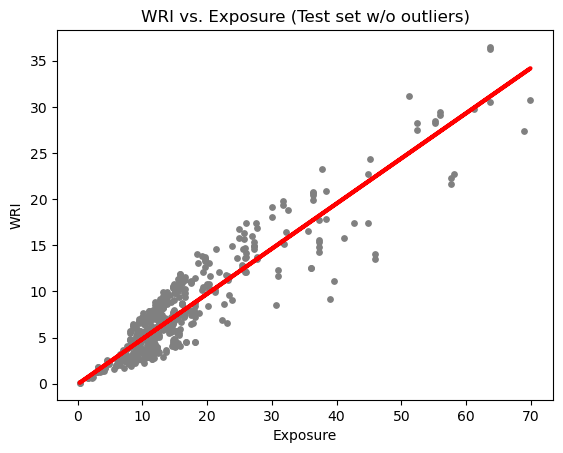

In [147]:
# Create a plot that shows the regression line from the model on the test set
plot_test_2 = plt
scat4_testset_woo = plot_test_2.scatter(X_test_2, y_test_2, color='gray', s=15)
plot_test_2.plot(X_test_2, y_predicted_2, color='red', linewidth=3)
plot_test_2.title('WRI vs. Exposure (Test set w/o outliers)')
plot_test_2.xlabel('Exposure')
plot_test_2.ylabel('WRI')
plot_test_2.show()

In [149]:
scat4_testset_woo.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat4_testset_woo.png'), bbox_inches='tight', dpi=300)

In [151]:
# Create objects containing the model's summary statistics
rmse_2 = mean_squared_error(y_test_2, y_predicted_2) # Mean squared error
r2_2 = r2_score(y_test_2, y_predicted_2) # R2 score

In [153]:
# Print summary statistics
print('Slope:', regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.48938353]]
Mean squared error:  4.867179591504396
R2 score:  0.8410554271202886


#### Interpretation:

With outliers removed, the model performs only slightly better (MSE of 4.867179591504397 vs. 5.023977788209462; R2 of 0.8410554271202886 vs. 0.8386897606193112). Since removing outliers may be a distortion of reality and doesn't result in a better fitting model, this model can safely be disregarded.